In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("customer_data.csv")
numeric_features = ['Age', 'Income', 'Tenure', 'SupportCalls']
scaled_cols = ['Age', 'Income', 'Tenure', 'SupportCalls']


In [4]:
# Load dataset
#step 1
display(df.head())          
print("\n--- Info ---")
df.info()         
print("\n--- Describe ---")
display(df.describe())   



,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
0,CUST0000,59.0,0,151203.0,4.0,0,1.0,0
1,CUST0001,69.0,0,58332.0,6.0,1,9.0,0
2,CUST0002,46.0,1,149481.0,2.0,0,12.0,0
3,CUST0003,32.0,1,115937.0,1.0,1,13.0,0
4,CUST0004,60.0,0,103929.0,4.0,1,5.0,0



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3500 non-null   object 
 1   Age           3325 non-null   float64
 2   Gender        3500 non-null   int64  
 3   Income        3328 non-null   float64
 4   Tenure        3325 non-null   float64
 5   ProductType   3500 non-null   int64  
 6   SupportCalls  3329 non-null   float64
 7   ChurnStatus   3500 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 218.9+ KB

--- Describe ---


,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
count,3325.000000,3500.000000,3.328000e+03,3325.000000,3500.000000,3329.000000,3500.000000
mean,43.606617,0.495714,1.406860e+05,5.041504,0.298857,10.078702,0.044857
std,14.931487,0.500053,4.333271e+05,2.571029,0.457822,21.735374,0.207020
min,14.000000,0.000000,2.503700e+04,0.000000,0.000000,1.000000,0.000000
25%,31.000000,0.000000,5.653025e+04,3.000000,0.000000,3.000000,0.000000
50%,43.000000,0.000000,8.953250e+04,5.000000,0.000000,7.000000,0.000000
75%,56.000000,1.000000,1.215025e+05,7.000000,1.000000,11.000000,0.000000
max,69.000000,1.000000,5.004849e+06,9.000000,1.000000,200.000000,1.000000


In [5]:
# Check missing values again
missing = df.isnull().sum()

print("Missing values before handling:\n", missing)

missing_percent = (missing / len(df)) * 100
print (missing_percent)
# Example: Fill numeric columns with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':   #?we use mean here since it better for numerical value
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])    #?we use mode here since it is not a numerical value


# Verify
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values before handling:
 CustomerID        0
Age             175
Gender            0
Income          172
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64
CustomerID      0.000000
Age             5.000000
Gender          0.000000
Income          4.914286
Tenure          5.000000
ProductType     0.000000
SupportCalls    4.885714
ChurnStatus     0.000000
dtype: float64

Missing values after handling:
 CustomerID      0
Age             0
Gender          0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
dtype: int64


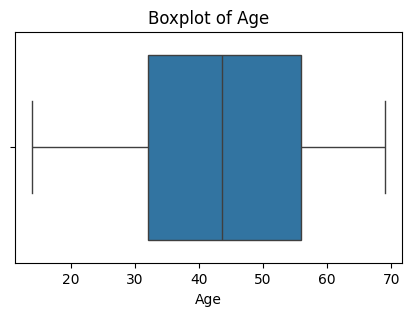

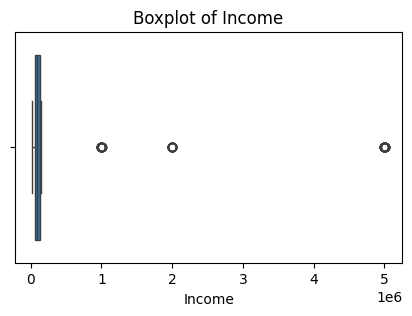

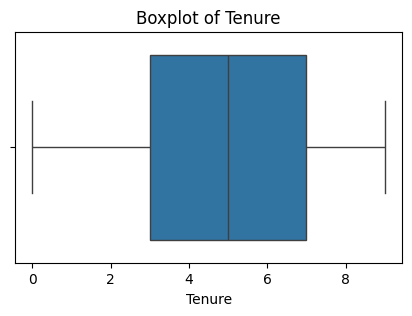

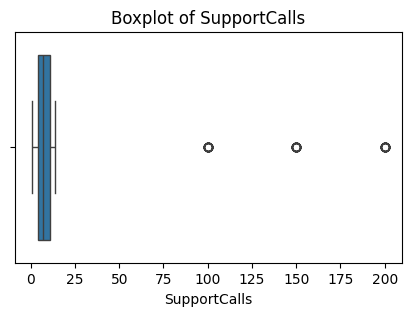


 Data after removing outliers:


,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000
mean,43.523457,0.499256,90376.541988,5.026794,0.296638,7.225641,0.045225
std,14.535316,0.500074,37399.102658,2.510388,0.456843,4.144532,0.207827
min,14.000000,0.000000,25037.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,0.000000,57888.000000,3.000000,0.000000,4.000000,0.000000
50%,43.606617,0.000000,91922.000000,5.000000,0.000000,7.000000,0.000000
75%,55.000000,1.000000,124524.000000,7.000000,1.000000,11.000000,0.000000
max,69.000000,1.000000,151961.000000,9.000000,1.000000,14.000000,1.000000


In [6]:

#handling outliers
for col in numeric_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Optionally remove outliers using IQR method
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]   #remove outliers

   

print("\n Data after removing outliers:")
display(df.describe())

In [7]:

scaler = StandardScaler() #z-score


df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("Scaled data preview:")
display(df.head())

Scaled data preview:


,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
0,CUST0000,1.064913,0,1.626657,-0.409079,0,-1.502357,0
1,CUST0001,1.752995,0,-0.856954,0.387729,1,0.428184,0
2,CUST0002,0.170406,1,1.580606,-1.205887,0,1.152137,0
3,CUST0003,-0.792908,1,0.683553,-1.604291,1,1.393455,0
4,CUST0004,1.133721,0,0.362428,-0.409079,1,-0.537087,0


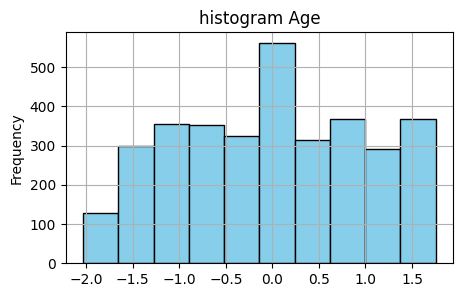

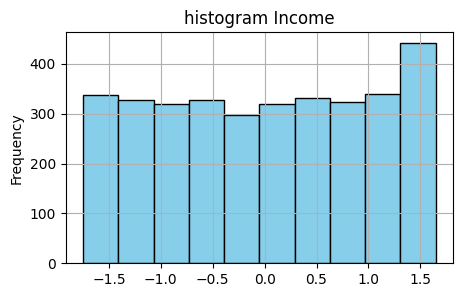

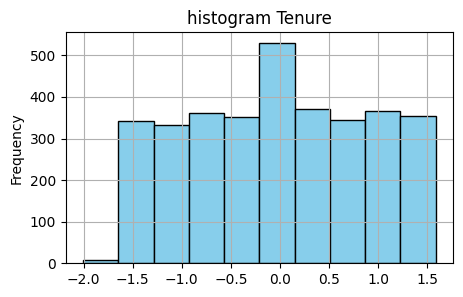

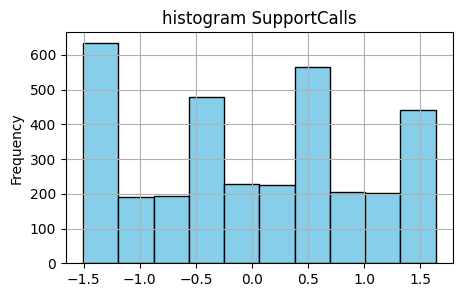

In [8]:

for col in numeric_features:
    plt.figure(figsize=(5, 3))
    plt.hist(x=df[col],color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.title(f"histogram {col}")
    plt.ylabel("Frequency")
    plt.show()

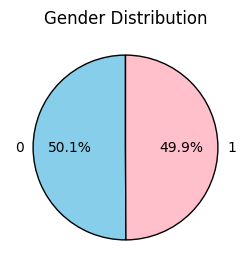

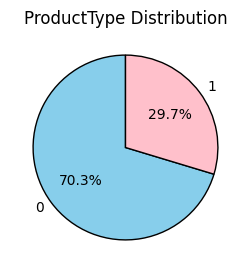

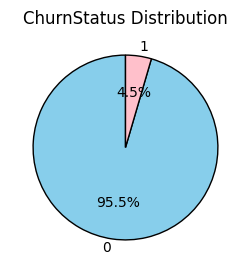

In [8]:

categorical_features =  ['Gender' , 'ProductType' , 'ChurnStatus' ] 

for col in categorical_features:
    plt.figure(figsize=(5, 3))
    counts = df[col].value_counts()
    plt.pie(counts.values, 
            labels=counts.index, 
            autopct='%1.1f%%',       
            startangle=90,           
            colors=['skyblue', 'pink'][:len(counts)], 
            wedgeprops={'edgecolor': 'black'})  # add border

    plt.title(f"{col} Distribution")
    plt.show()

C:\Users\TUF\AppData\Local\Temp\ipykernel_548\2158063422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y=col, data=df, palette='Set2')


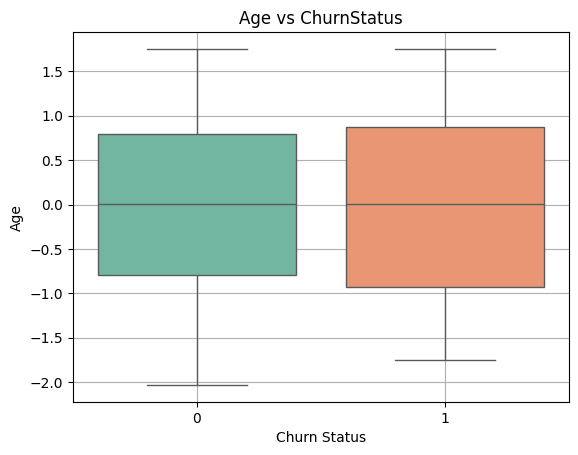

C:\Users\TUF\AppData\Local\Temp\ipykernel_548\2158063422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y=col, data=df, palette='Set2')


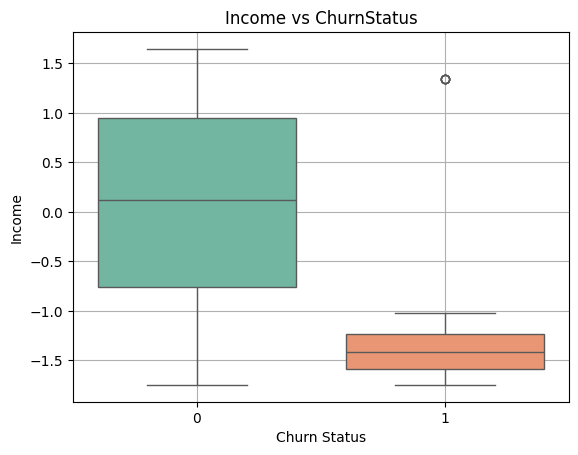

C:\Users\TUF\AppData\Local\Temp\ipykernel_548\2158063422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y=col, data=df, palette='Set2')


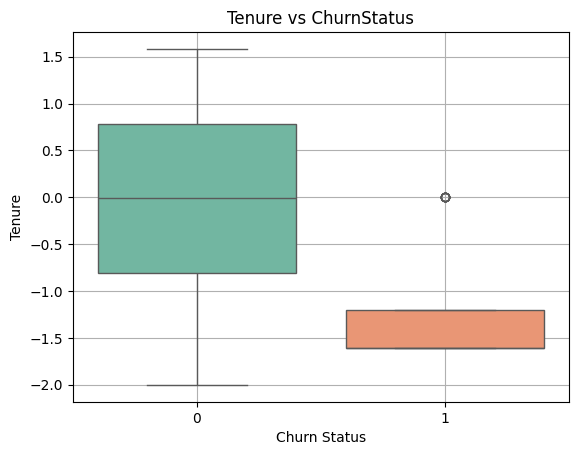

C:\Users\TUF\AppData\Local\Temp\ipykernel_548\2158063422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y=col, data=df, palette='Set2')


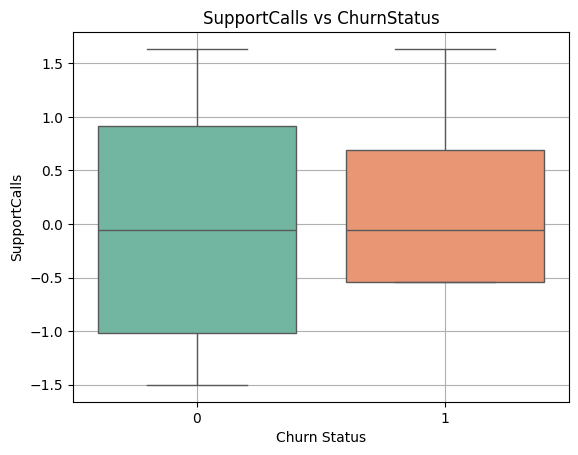

In [9]:

for col in numeric_features :
    sns.boxplot(x='ChurnStatus', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs ChurnStatus")
    plt.xlabel("Churn Status")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()
    plt.show()


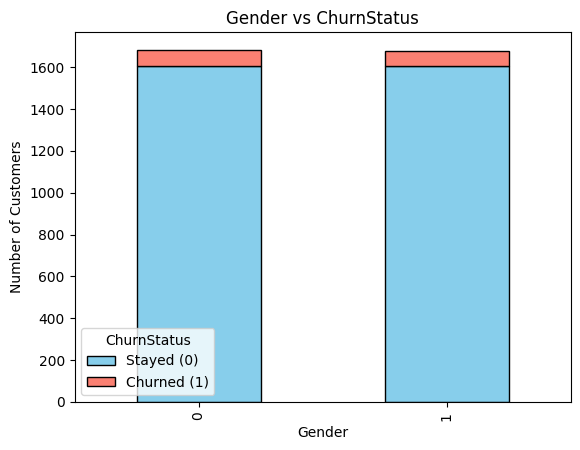

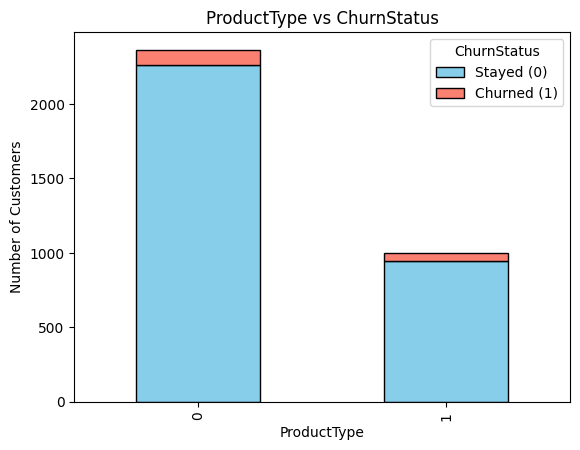

In [10]:

categorical_features2 = ['Gender', 'ProductType']

for col in categorical_features2:
    counts = df.groupby([col, 'ChurnStatus']).size().unstack()  # pivot table
    counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')
    plt.title(f"{col} vs ChurnStatus")
    plt.xlabel(col)
    plt.ylabel("Number of Customers")
    plt.legend(title='ChurnStatus', labels=['Stayed (0)', 'Churned (1)'])
    plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

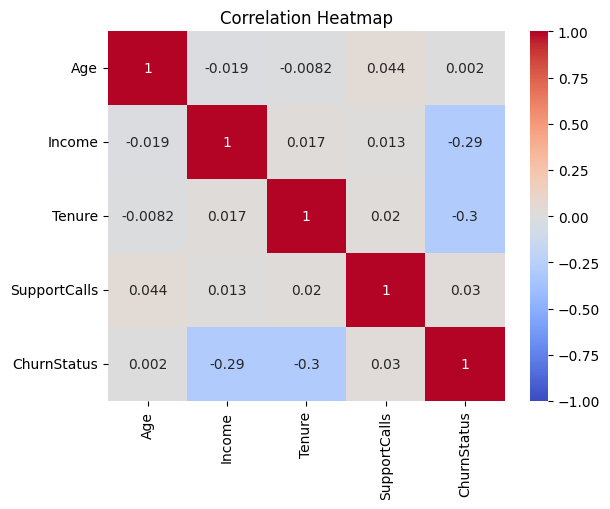

In [14]:
numeric_featurestt = ['Age', 'Income', 'Tenure', 'SupportCalls', 'ChurnStatus']
sns.heatmap( df[numeric_featurestt].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.title("Correlation Heatmap")